# Evaluation script for Example 1: Burgers' equation

In [1]:
import sys
# import os
# print(os.getcwd())
sys.path.append("../")
from libs import *
device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')
torch.cuda.empty_cache()

Package not found.


## Loading evaluation data
First we evaluate the Fourier Transformer for $n=2048$ case (`seq_len = 2048`).

In [2]:
import os
subsample = 2
val_batch_size = 4
data_path = os.path.join(DATA_PATH, 'burgers_data_R10.mat')
valid_dataset = BurgersDataset(subsample=subsample,
                                train_data=False,
                                valid_portion=100,
                                data_path=data_path)
valid_loader = DataLoader(valid_dataset, batch_size=val_batch_size, shuffle=False,
                              drop_last=False, pin_memory=True)

Loading burgers_data_R10.mat for valid.: start at 1743402373.01;
LOCAL RAM USAGE AT START: 0.38 GB
Loading burgers_data_R10.mat for valid.: done at 1743402378.55 (5.538563 secs elapsed);
LOCAL RAM USAGE AT END: 0.63GB (+0.25GB)




## Loading models

In [3]:
with open(os.path.join(SRC_ROOT, 'config.yml')) as f:
    config = yaml.full_load(f)['ex1_burgers']
    
torch.cuda.empty_cache()
model = SimpleTransformer(**config)
model = model.to(device)

# Evaluate the model
The error is approximately: 
$$\frac{1}{N}\sum_{i=1}^N \|T_{\theta}(u_0) - u(\cdot, t_1)\|_{L^2(\Omega)}$$

In [4]:
# h = (1/2**13)*subsample
# metric_func = WeightedL2Loss(regularizer=False, h=h)
# model.load_state_dict(torch.load(os.path.join(MODEL_PATH, 'Burgers_4096_4ft_288d_qkv_2024-01-12.pt')))
# model.eval()
# val_metric = validate_epoch_burgers(model, metric_func, valid_loader, device)
# print(f"\nModel's validation metric: {list(val_metric.values())[0]:.3e}")

# Let us plot several solutions!

In [5]:
# for _ in range(3):
#     sample = next(iter(valid_loader))
#     node = sample['node']
#     pos = sample['pos']
#     grid = sample['grid']
#     u = sample['target']

#     with torch.no_grad():
#         model.eval()
#         out_dict = model(node.to(device), 
#                         None, pos.to(device), grid.to(device))

#     out = out_dict['preds']
#     preds = out[..., 0].detach().cpu()

#     _, axes = plt.subplots(nrows=val_batch_size, ncols=1, figsize=(20, 5*val_batch_size))
#     axes = axes.reshape(-1)
#     for i in range(val_batch_size):
#         grid = pos[i, :, 0]
#         axes[i].plot(grid, node[i, :, 0], '-', color='y', linewidth=1.5, label='u_0')
#         axes[i].plot(grid, u[i, :, 0], color='g', linewidth=3, label='u(x,1)')
#         axes[i].plot(grid, preds[i, :], '--', color='r', linewidth=2, label='u_preds(x)')
#         axes[i].legend(fontsize=20)
#     plt.show()

# How about the Galerkin Transformer?

This time we do not do subsample: $n=4096$

In [6]:
# subsample = 2
# val_batch_size = 4
# data_path = os.path.join(DATA_PATH, 'burgers_data_R10.mat')
# valid_dataset = BurgersDataset(subsample=subsample,
#                                 train_data=False,
#                                 valid_portion=100,
#                                 data_path=data_path,)
# valid_loader = DataLoader(valid_dataset, batch_size=val_batch_size, shuffle=False,
#                               drop_last=False, pin_memory=True)

# Loading the model and compute the error on the validation set

In [7]:
# with open(os.path.join(SRC_ROOT, 'config.yml')) as f:
#     config = yaml.full_load(f)['ex1_burgers']
# config['attention_type'] = 'galerkin'
# torch.cuda.empty_cache()
# model = SimpleTransformer(**config)
# model = model.to(device)

# h = (1/2**13)*subsample
# metric_func = WeightedL2Loss(regularizer=False, h=h)
# model.load_state_dict(torch.load(os.path.join(MODEL_PATH, 'Burgers_4096_4gt_288d_qkv_2024-01-12.pt')))
# model.eval()
# val_metric = validate_epoch_burgers(model, metric_func, valid_loader, device)
# print(f"\nModel's validation metric: {list(val_metric.values())[0]:.3e}")

# Let us plot some solutions!
Unfortunately the error is too small for human eyes to tell the difference with above...

In [8]:
# for _ in range(3):
#     sample = next(iter(valid_loader))
#     node = sample['node']
#     pos = sample['pos']
#     grid = sample['grid']
#     u = sample['target']

#     with torch.no_grad():
#         model.eval()
#         out_dict = model(node.to(device), 
#                         None, pos.to(device), grid.to(device))

#     out = out_dict['preds']
#     preds = out[..., 0].detach().cpu()

#     _, axes = plt.subplots(nrows=val_batch_size, ncols=1, figsize=(20, 5*val_batch_size))
#     axes = axes.reshape(-1)
#     for i in range(val_batch_size):
#         grid = pos[i, :, 0]
#         axes[i].plot(grid, node[i, :, 0], '-', color='b', linewidth=1.5, label='u_0')
#         axes[i].plot(grid, u[i, :, 0], color='g', linewidth=3, label='u(x,t_1)')
#         axes[i].plot(grid, preds[i, :], '--', color='r', linewidth=2, label='u_preds(x)')
#         axes[i].legend(fontsize=20)
#     plt.show()

### How about the Lrk attention?

In [9]:
subsample = 2
val_batch_size = 4
data_path = os.path.join(DATA_PATH, 'burgers_data_R10.mat')
valid_dataset = BurgersDataset(subsample=subsample,
                                train_data=False,
                                valid_portion=100,
                                data_path=data_path,)
valid_loader = DataLoader(valid_dataset, batch_size=val_batch_size, shuffle=False,
                              drop_last=False, pin_memory=True)

Loading burgers_data_R10.mat for valid.: start at 1743402383.28;
LOCAL RAM USAGE AT START: 1.57 GB
Loading burgers_data_R10.mat for valid.: done at 1743402388.75 (5.471438 secs elapsed);
LOCAL RAM USAGE AT END: 1.82GB (+0.25GB)




In [10]:
param =torch.load(os.path.join(MODEL_PATH, 'Burgers_4096_4Lt_288d_qkv_2024-09-05.pt'))
k = len(param["v"])
print(k)
with open(os.path.join(SRC_ROOT, 'config.yml')) as f:
    config = yaml.full_load(f)['ex1_burgers']
config['attention_type'] = 'Lrk'
config["k"] = k
config["seq_len"] = int(8192/subsample)
torch.cuda.empty_cache()
model = SimpleTransformer(**config)
model = model.to(device)

h = (1/2**13)*subsample
metric_func = WeightedL2Loss(regularizer=False, h=h)
model.load_state_dict(param)
model.eval()
val_metric = validate_epoch_burgers(model, metric_func, valid_loader, device)
print(f"\nModel's validation metric: {list(val_metric.values())[0]:.3e}")

1

Model's validation metric: 1.629e-03


L2 error: 0.0012520134


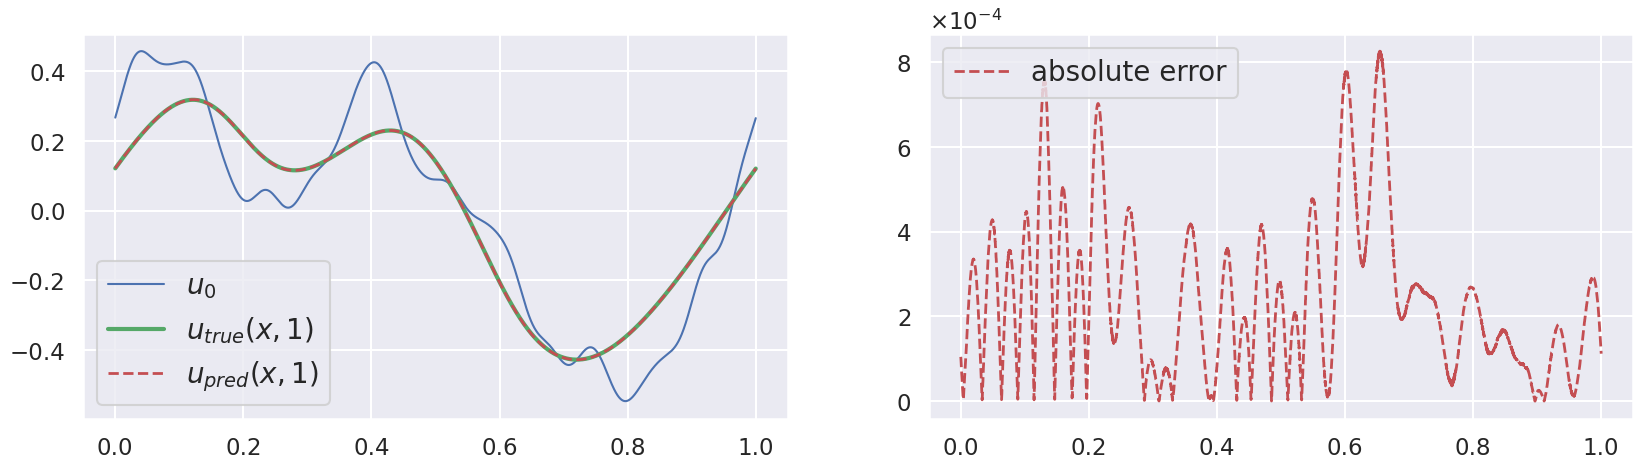

In [11]:
import matplotlib.ticker as ticker
for _ in range(1):
    sample = next(iter(valid_loader))
    node = sample['node']
    pos = sample['pos']
    grid = sample['grid']
    u = sample['target']

    with torch.no_grad():
        model.eval()
        out_dict = model(node.to(device), 
                        None, pos.to(device), grid.to(device))

    out = out_dict['preds']
    preds = out[..., 0].detach().cpu()

    # _, axes = plt.subplots(nrows=val_batch_size, ncols=1, figsize=(20, 5*val_batch_size))
    # axes = axes.reshape(-1)
    # for i in range(val_batch_size):
    #     grid = pos[i, :, 0]
    #     axes[i].plot(grid, node[i, :, 0], '-', color='b', linewidth=1.5, label='u_0')
    #     axes[i].plot(grid, u[i, :, 0], color='g', linewidth=3, label='u(x,t_1)')
    #     axes[i].plot(grid, preds[i, :], '--', color='r', linewidth=2, label='u_preds(x)')
    #     axes[i].legend(fontsize=20)
    # plt.show()
    
    _, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
    axes = axes.reshape(-1)
    grid = pos[0, :, 0]
    axes[0].plot(grid, node[0, :, 0], '-', color='b', linewidth=1.5, label='$u_0$')
    axes[0].plot(grid, u[0, :, 0], color='g', linewidth=3, label='$u_{true}(x,1)$')
    axes[0].plot(grid, preds[0, :], '--', color='r', linewidth=2, label='$u_{pred}(x, 1)$')
    axes[0].legend(fontsize=20)
    
    axes[1].plot(grid, np.abs(u[0,:,0]-preds[0, :]), '--', color='r', linewidth=2, label='absolute error')
    axes[1].legend(fontsize=20)
    axes[1].yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
    axes[1].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    
    print("L2 error:", np.linalg.norm(preds[0, :]- u[0, :, 0])/np.linalg.norm(u[0, :, 0]))
    
    # plt.savefig("burgers_lrk_result.eps",format="eps", dpi=500)
    plt.show()